# Data Analysis Pipeline

## Load Data
- The data is in csv format, therefore the delimiter is comma, no need to skip rows or columns.
- We can done this using pandas.

In [1]:
import pandas as pd

DATA_PATH = '../../data/raw/netflix.csv'

df = pd.read_csv(DATA_PATH)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Clean Data
- The column "**show_id**" is not important since it's the index of each row. Moreover, the "**title**" and "**description**" is also not needed.
- The rows having NaN value should be replaced too.

In [ ]:
df.drop(['show_id', 'title', 'description'], inplace = True, axis = 1)
df.dropna(axis=0, how='any', inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

## Process Data
- Change the column named "**listed_in**" to "**Genre**" and capitalize orther columns' names.

In [ ]:
df = df.rename(columns = {
    'type': 'Type',
    'director': 'Director',
    'cast': 'Cast',
    'country': 'Country',
    'date_added': 'Date Added',
    'release_year': 'Release Year',
    'rating': 'Rating',
    'duration': 'Duration',
    'listed_in': 'Genre',
})
df.head()

## Wrangle Data
- Format the "**data_added**" and "**release_year**" columns to Datetime object.
- Format the "**duration**" column to integer (TV shows 👉 season, Movie 👉 minute).
- Put the casts in "**cast**" column, genres in "**genre**", and countries in "**country**" column into lists.

**Save processed data to a csv file**

In [ ]:
df['Date Added'] = pd.to_datetime(df['Date Added']).dt.date
df['Release Year'] = pd.to_datetime(df['Release Year'], format='%Y').dt.year
df['Duration'] = pd.to_numeric(df['Duration'].str.split().apply(lambda x: x[0]))
df['Cast'] = df['Cast'].str.split(',')
df['Country'] = df['Country'].str.split(',')
df['Genre'] = df['Genre'].str.split(',')
df

In [ ]:
df.to_csv('processed_netflix_data.csv')

# Method Chaining and writing Python programs

In [ ]:
from script.project_functions import load_and_process

load_and_process(DATA_PATH)

# Exploratory Data Analysis

## Step 1: Understand, Load, and Clean Data

In [10]:
from script.project_functions import load_and_process

df = load_and_process(DATA_PATH)
df.head()

,Type,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Genre,Added Delay
0,Movie,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",[Mexico],2016-12-23,2016,TV-MA,93,"[Dramas, International Movies]",0
1,Movie,Gilbert Chan,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",[Singapore],2018-12-20,2011,R,78,"[Horror Movies, International Movies]",7
2,Movie,Shane Acker,"[Elijah Wood, John C. Reilly, Jennifer Conne...",[United States],2017-11-16,2009,PG-13,80,"[Action & Adventure, Independent Movies, Sci...",8
3,Movie,Robert Luketic,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",[United States],2020-01-01,2008,PG-13,123,[Dramas],12
4,TV Show,Serdar Akar,"[Erdal Beşikçioğlu, Yasemin Allen, Melis Bir...",[Turkey],2017-07-01,2016,TV-MA,1,"[International TV Shows, TV Dramas, TV Myste...",1


In [11]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

df = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('Country')),
                index=df.index,
                columns=mlb.classes_))
df

,Type,Director,Cast,Date Added,Release Year,Rating,Duration,Genre,Added Delay,,...,Taiwan,Thailand,Turkey,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,Vietnam,Zimbabwe
0,Movie,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",2016-12-23,2016,TV-MA,93,"[Dramas, International Movies]",0,0,...,0,0,0,0,0,0,0,0,0,0
1,Movie,Gilbert Chan,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",2018-12-20,2011,R,78,"[Horror Movies, International Movies]",7,0,...,0,0,0,0,0,0,0,0,0,0
2,Movie,Shane Acker,"[Elijah Wood, John C. Reilly, Jennifer Conne...",2017-11-16,2009,PG-13,80,"[Action & Adventure, Independent Movies, Sci...",8,0,...,0,0,0,0,0,1,0,0,0,0
3,Movie,Robert Luketic,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",2020-01-01,2008,PG-13,123,[Dramas],12,0,...,0,0,0,0,0,1,0,0,0,0
4,TV Show,Serdar Akar,"[Erdal Beşikçioğlu, Yasemin Allen, Melis Bir...",2017-07-01,2016,TV-MA,1,"[International TV Shows, TV Dramas, TV Myste...",1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,Movie,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Ston...",2019-11-01,2009,R,88,"[Comedies, Horror Movies]",10,0,...,0,0,0,0,0,1,0,0,0,0
4804,Movie,Shlok Sharma,"[Shashank Arora, Shweta Tripathi, Rahul Kuma...",2018-07-01,2018,TV-MA,94,"[Dramas, Independent Movies, International M...",0,0,...,0,0,0,0,0,0,0,0,0,0
4805,Movie,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",2020-01-11,2006,PG,88,"[Children & Family Movies, Comedies]",14,0,...,0,0,0,0,0,1,0,0,0,0
4806,Movie,Josef Fares,"[Imad Creidi, Antoinette Turk, Elias Gergi, ...",2020-10-19,2005,TV-MA,99,"[Dramas, International Movies]",15,0,...,0,0,0,0,0,0,0,0,0,0


## Step 2: Explore

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.style.use('ggplot')
sns.set_palette('Set2')

Text(0.5, 0.98, 'RELEASE YEAR AND YEAR BEFORE BEING ADDED CORRELATION')

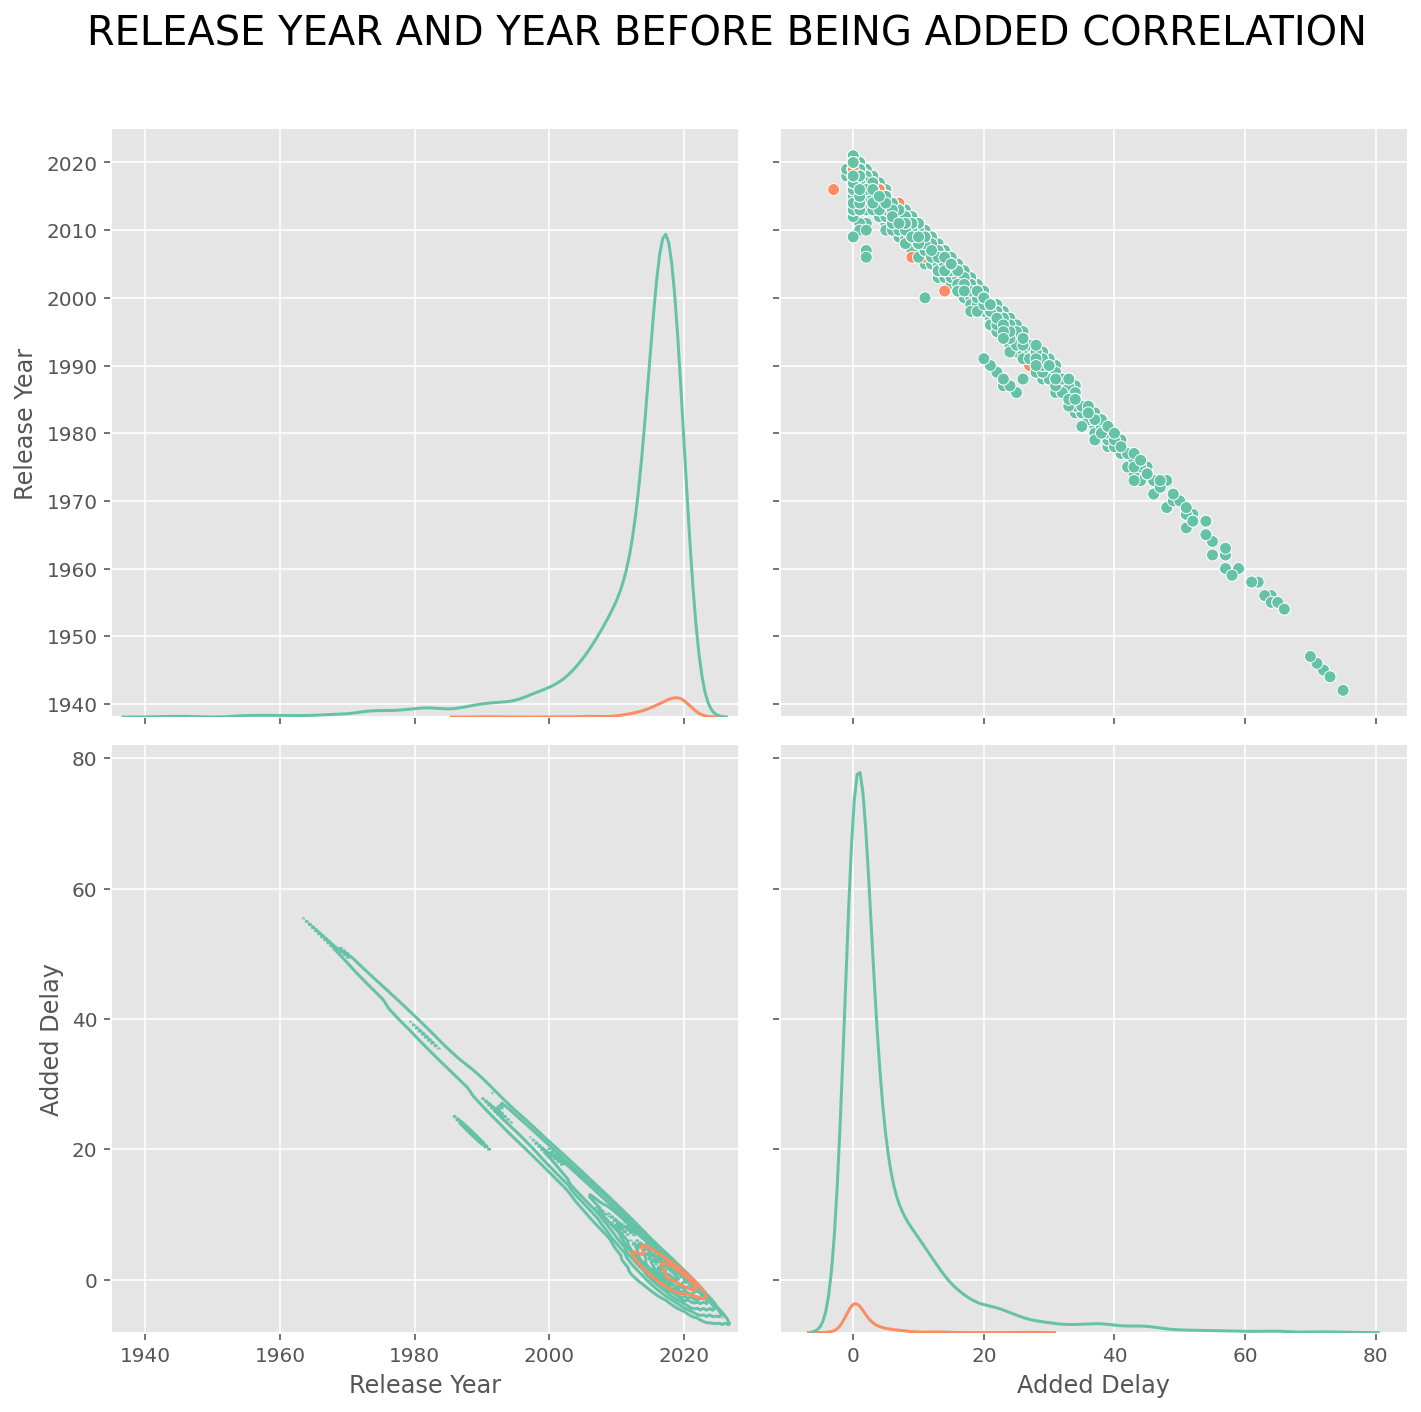

In [75]:
g = sns.PairGrid(df[['Type', 'Release Year', 'Added Delay']], hue='Type', height=5)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('RELEASE YEAR AND YEAR BEFORE BEING ADDED CORRELATION', fontsize = 20)

- There's a linear correlation between the deplay of Netflix in adding movies and their release year.
- There's Guass distribution in Added Delay and Release Year columns 👉 the data is not bias in these 2 columns.

In [76]:
def get_counted_list_genre(data):
    hash_map = dict()
    count = data.shape[0]
    for data_list in data:
        for data_item in data_list:
            data_item = data_item.strip()
            if data_item in hash_map:
                hash_map[data_item] += 1
            else:
                hash_map[data_item] = 1
    hash_map['Others'] = 0
    need_to_pop = []
    for k, v in hash_map.items():
        if v <= count * 0.1: # don't need to care about those who only accounted for less than 10%
            hash_map['Others'] += v
            need_to_pop.append(k)
    for k in need_to_pop:
        hash_map.pop(k)
    hash_map = dict(sorted(hash_map.items(), key=lambda item: item[1], reverse=True))
    
    values = list(hash_map.values())
    labels = list(hash_map.keys())
    
    return (labels, values)

In [77]:
movies_genres = df[df['Type'] == 'Movie']['Genre']
movies_labels, movies_values = get_counted_list_genre(movies_genres)
tv_shows_genres = df[df['Type'] == 'TV Show']['Genre']
tv_shows_labels, tv_shows_values = get_counted_list_genre(tv_shows_genres)

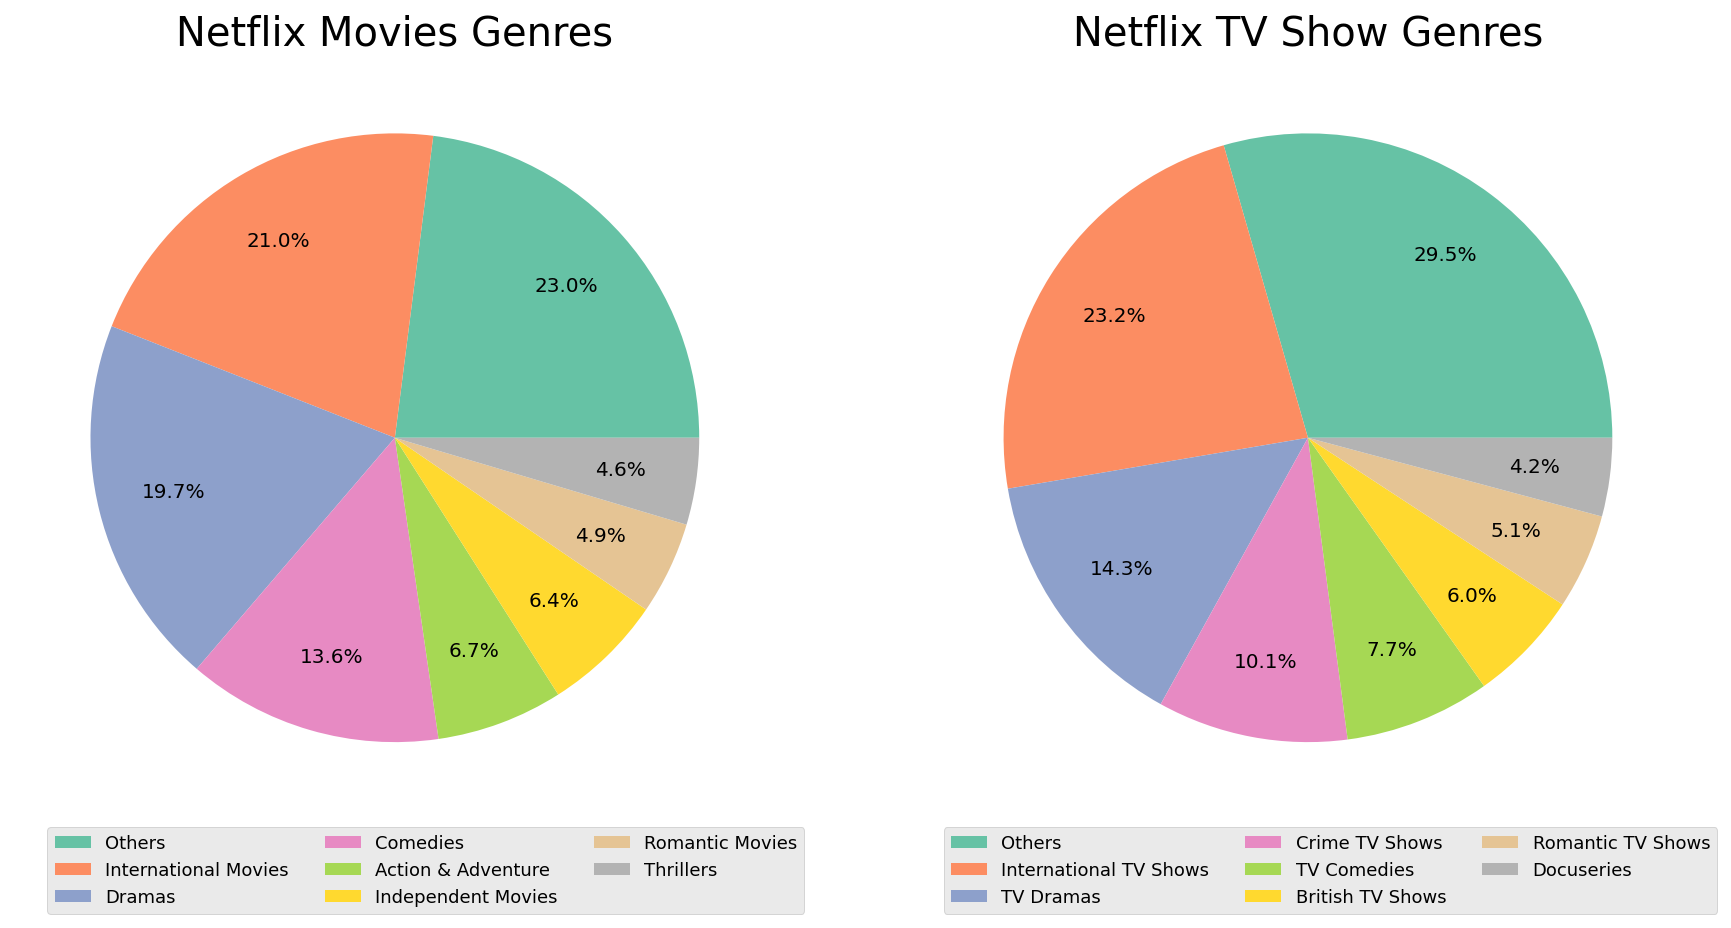

In [78]:
# Visualizing

fig = plt.figure(figsize = (15,8))
ax1 = fig.add_subplot(1,2,1)
ax1.pie(movies_values, autopct='%1.1f%%', pctdistance=.75)
plt.legend(movies_labels,
           bbox_to_anchor=[0, 0, 1.05, 0],
           ncol=3,
           prop={'size': 9}
          )
plt.title('Netflix Movies Genres', fontsize=20)

ax2 = fig.add_subplot(1,2,2)
ax2.pie(tv_shows_values, autopct='%1.1f%%', pctdistance=0.75)
plt.legend(tv_shows_labels,
           bbox_to_anchor=[0, 0, 1.05, 0],
           ncol=3,
           prop={'size': 9}
          )
plt.title('Netflix TV Show Genres', fontsize=20)

plt.show()

[Text(0, 0.5, 'Number Of Movies And TV Shows'), Text(0.5, 0, 'All Ratings')]

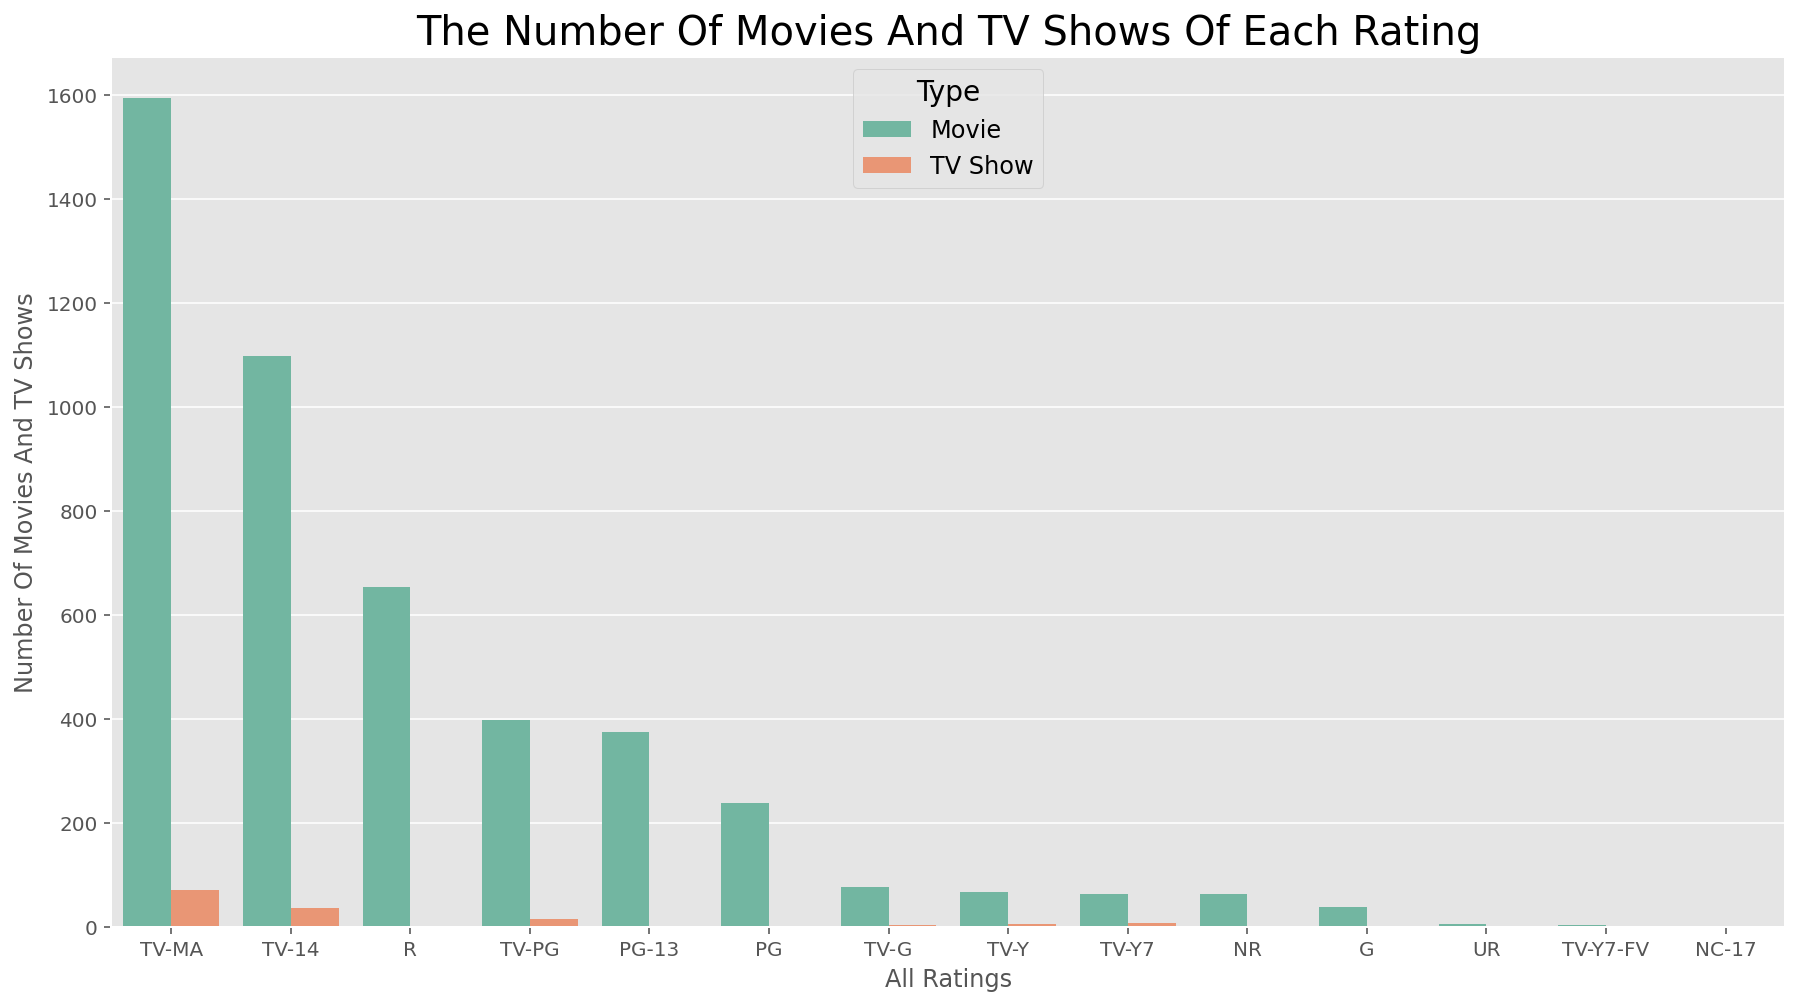

In [79]:
fig, ax = plt.subplots(figsize = (15,8))
fig = plt.figure(figsize = (15,8))
ax = 
ax = sns.countplot(data=df, x='Rating', hue='Type', order=df['Rating'].value_counts().index)
ax.legend(title='Type', fontsize=12)
ax.set_title('The Number Of Movies And TV Shows Of Each Rating', fontsize=20)
plt.setp(ax.get_legend().get_title(), fontsize='14')
ax.set(ylabel='Number Of Movies And TV Shows', xlabel='All Ratings')

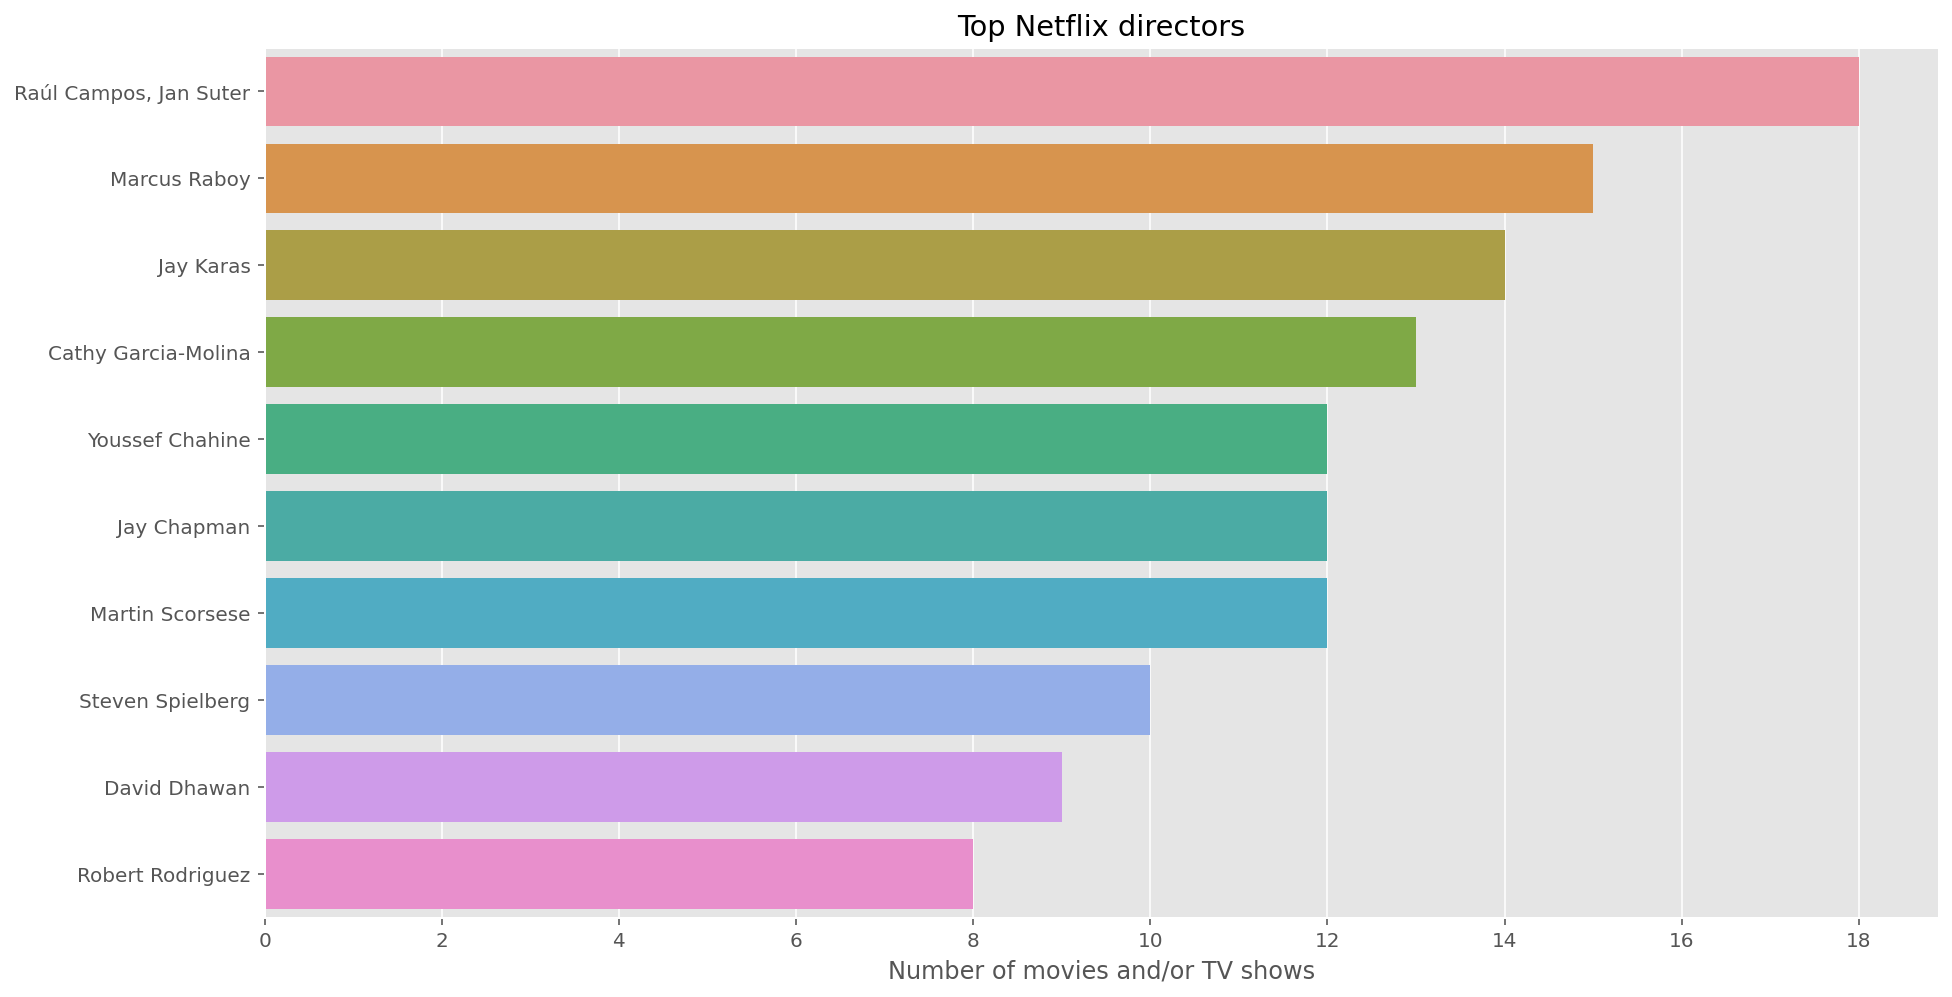

In [139]:
_, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(data=df, y='Director', order=df['Director'].value_counts().iloc[:10].index).set(title='Top Netflix directors', xlabel='Number of movies and/or TV shows', ylabel='', xticks=list(range(0, df['Director'].value_counts().max() + 1, 2)))

18 movies is a large number in directoring. It seems like Netflix really likes Raúl Campos and Jan Suter.

In [140]:
# _, ax = plt.subplots(figsize = (15, 8))
# ax = sns.countplot(data=df, y='Cast', order=df['Cast'].value_counts().iloc[:10].index)

def get_casts_lists(n_rows):
    hash_map = dict()
    for casts in df['Cast']:
        for cast in casts:
            cast = cast.strip()
            if cast in hash_map:
                hash_map[cast] += 1
            else:
                hash_map[cast] = 1
    hash_map = dict(sorted(hash_map.items(), key=lambda item: item[1], reverse=True))
    return (list(hash_map.keys())[:n_rows], list(hash_map.values())[:n_rows])

In [141]:
casts, n_involved = get_casts_lists(10)

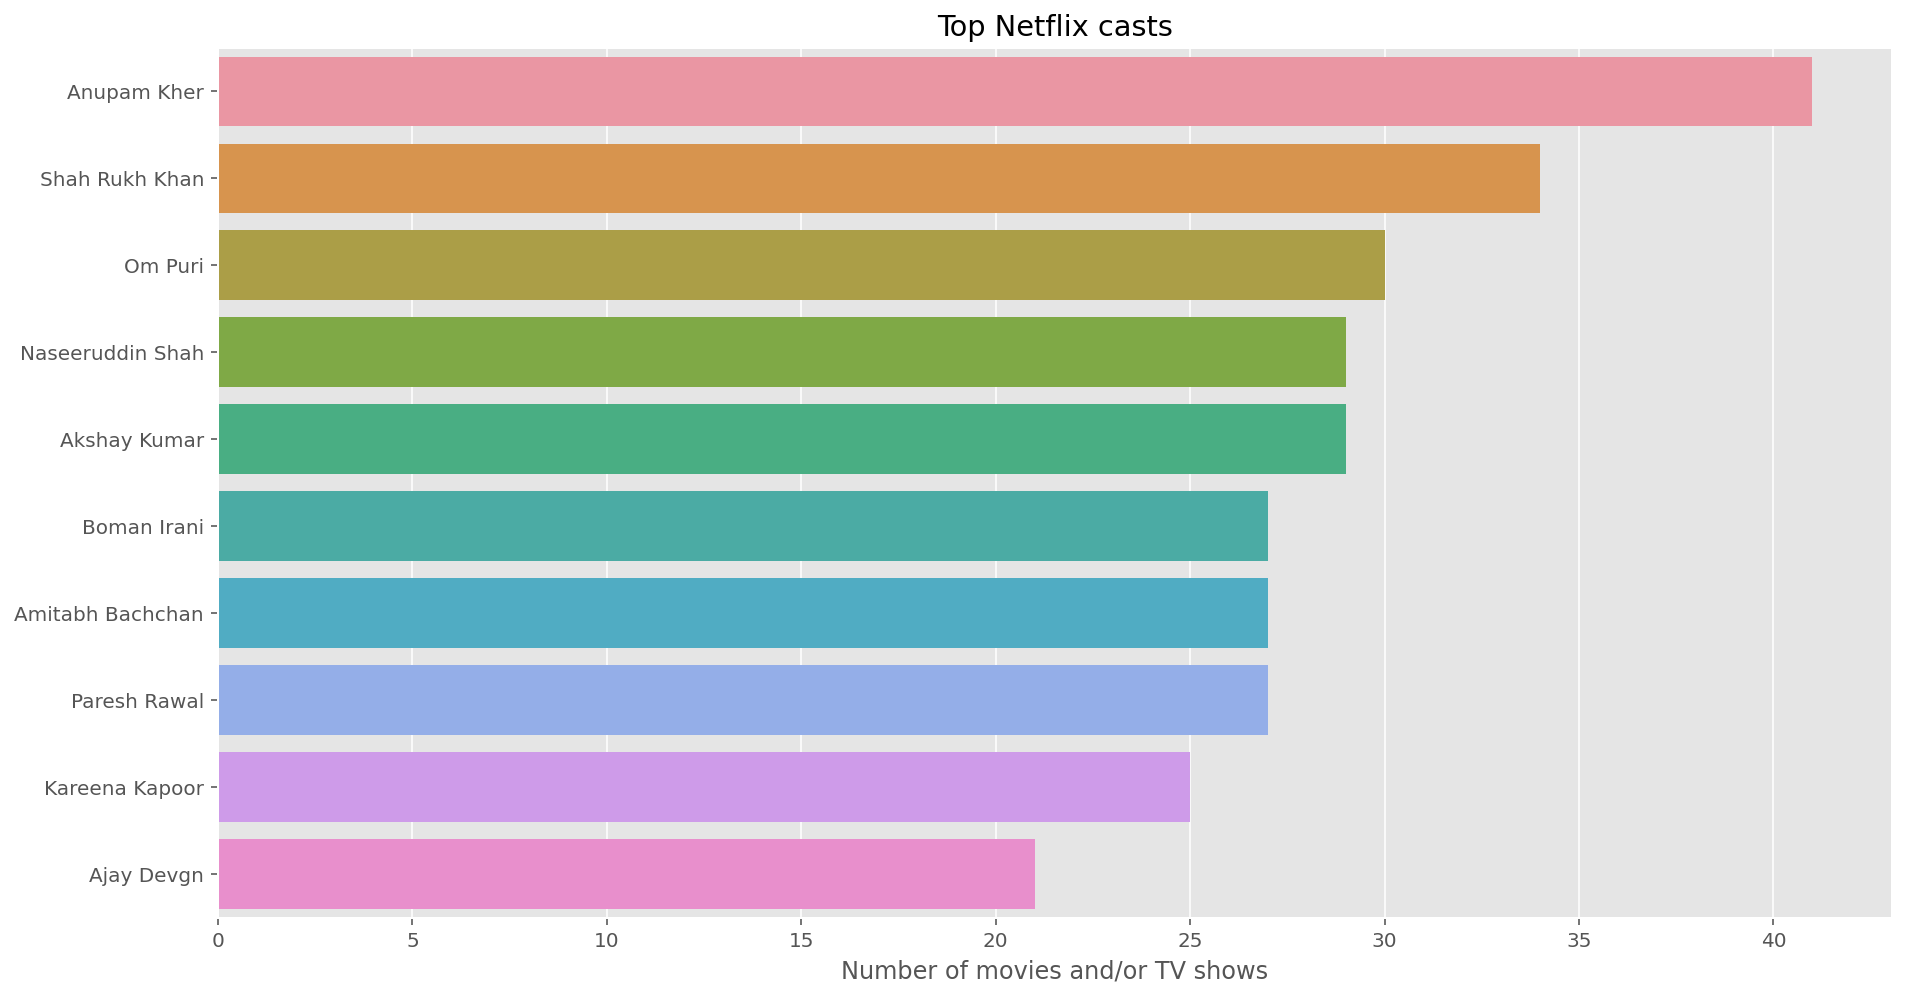

In [142]:
_, ax = plt.subplots(figsize = (15, 8))
ax = sns.barplot(y = casts, x = n_involved).set(title='Top Netflix casts', xlabel='Number of movies and/or TV shows')

Interesting observation: top 10 actors of Netflix are all Indians.